In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.sample(5)

,Class label,Alcohol,Malic acid
136,3,12.25,4.72
12,1,13.75,1.73
10,1,14.10,2.16
27,1,13.30,1.72
135,3,12.60,2.46


<Axes: xlabel='Alcohol', ylabel='Density'>

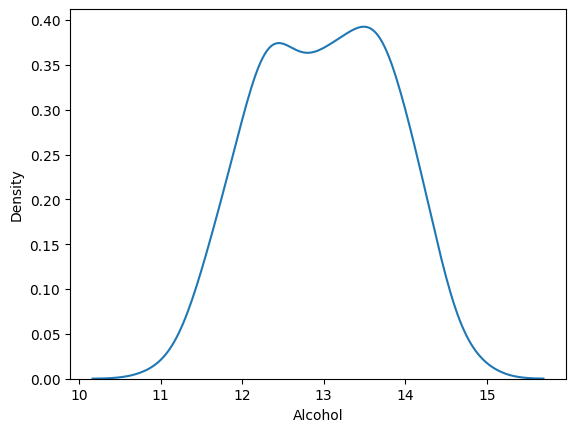

In [3]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

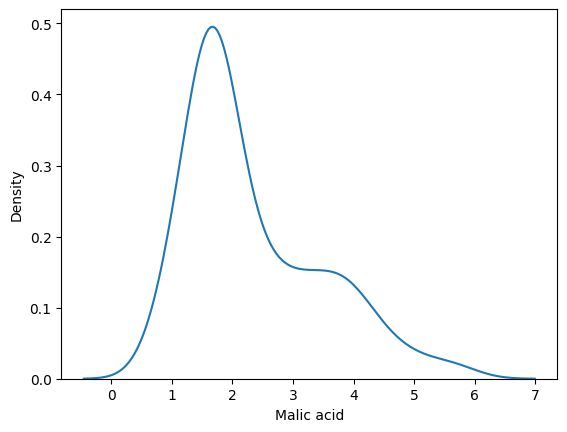

In [4]:
sns.kdeplot(df['Malic acid'])

In [5]:
#import test_split
from sklearn.model_selection import train_test_split


X_train , X_test , Y_train , Y_test = train_test_split(df[['Alcohol','Malic acid']],df['Class label'],test_size=0.3,random_state=0)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # fit only on training data , how it is trained? it is trained on the basis of min and max value of training data ,
#what it trains ? it trains the min and max value of training data

X_train_scaled = scaler.transform(X_train) # transform the training data means it will scale the training data between 0 and 1
X_test_scaled = scaler.transform(X_test) # transform the test data means it will scale the test data between 0 and 1


In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=['Alcohol','Malic acid'])
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [8]:
np.round(X_train.describe(),2) #2 is the number of decimal places

,Alcohol,Malic acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [9]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After scaling')

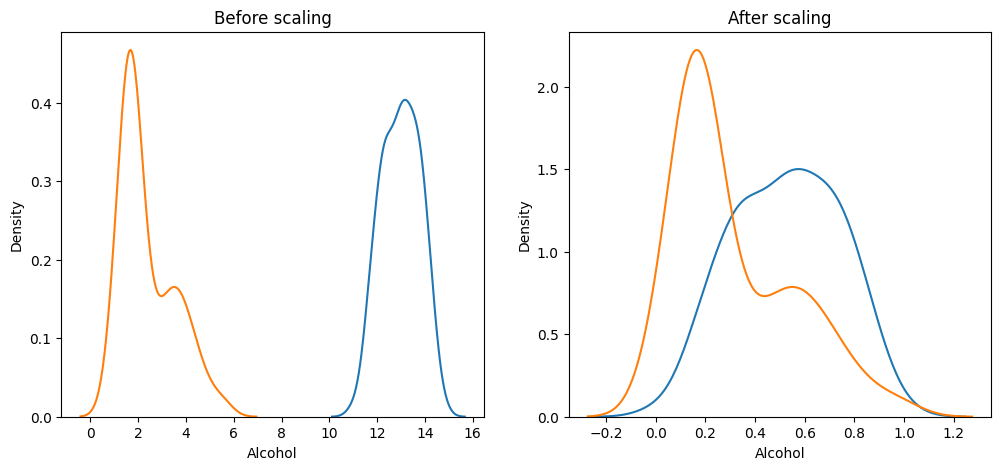

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
# befor scaling
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
ax1.set_title('Before scaling')
# after scaling
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
ax2.set_title('After scaling')



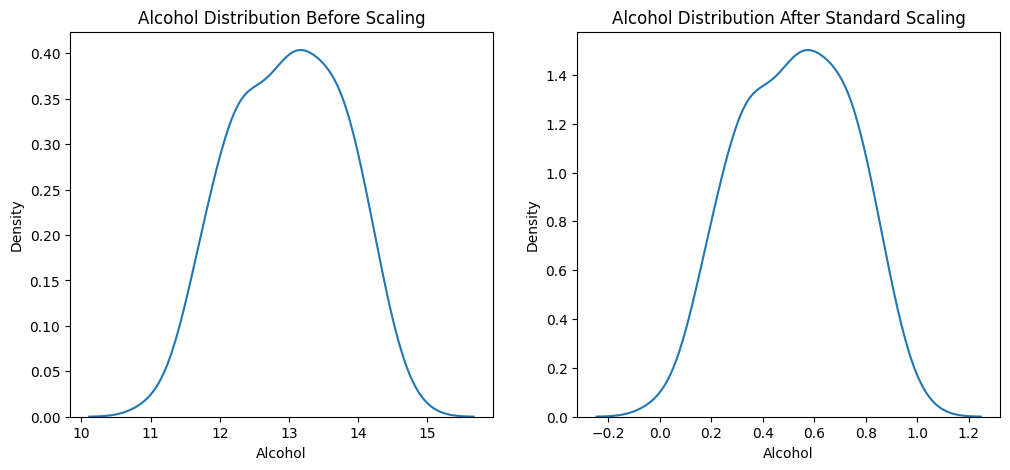

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

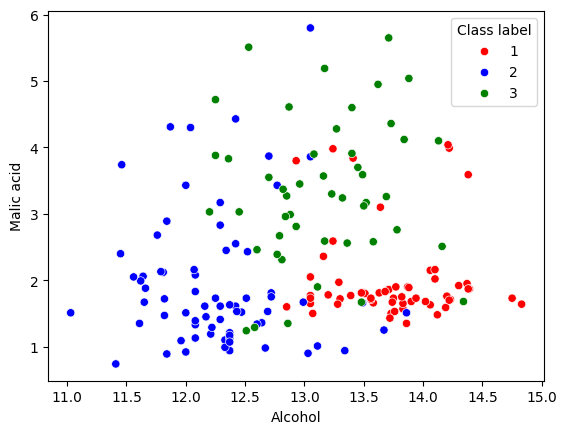

In [14]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df, palette=color_dict)